# Python Implementation

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,plot_roc_curve,roc_auc_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:/Users/ankus/Downloads/mushroom_csv.csv')
data

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [3]:
data.shape

(8124, 23)

In [4]:
pd.set_option('display.max_columns',None)
data

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,NaN,s,s,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,NaN,s,k,w,w,p,w,o,e,w,v,l,p


In [5]:
data.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,5644,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,4,4,4,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [6]:
#checking the null values
data.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [7]:
#replacing null values
data['stalk-root']=data['stalk-root'].fillna(data['stalk-root'].mode()[0])

In [8]:
data.isnull().sum().sum()

0

now there is no null value


# Target Variable

     >class

<function matplotlib.pyplot.show(close=None, block=None)>

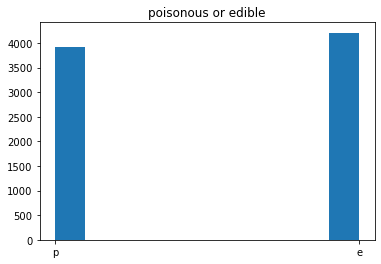

In [9]:
data["class"].hist(grid=False)
plt.title("poisonous or edible")
plt.show

there is no sign of class imbalance

In [10]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

# Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

data = data.copy()
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])
data.head()   

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,0,2,1,0,3,0,1,0


# seperating labels and features

In [12]:
x=data.drop(['class'],axis=1)
y=data['class']

In [13]:
x

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [14]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

# Checking Correlation

In [15]:
data.corr()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.000962,-0.030417,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221,0.052951
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.025486,0.089090,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887,0.178446
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.266953,-0.060837,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925,-0.031384
bruises%3F,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.061086,0.460824,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095,-0.501530
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.032269,0.118617,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610,-0.093552
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.066023,-0.088916,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304,0.129200
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.411409,-0.212359,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680,-0.348387
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.108373,0.056310,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418,0.540024
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.112979,0.224287,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972,-0.530566
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,-0.115148,0.015193,-0.034399,0.223439,0.235794,NaN,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216,-0.102019


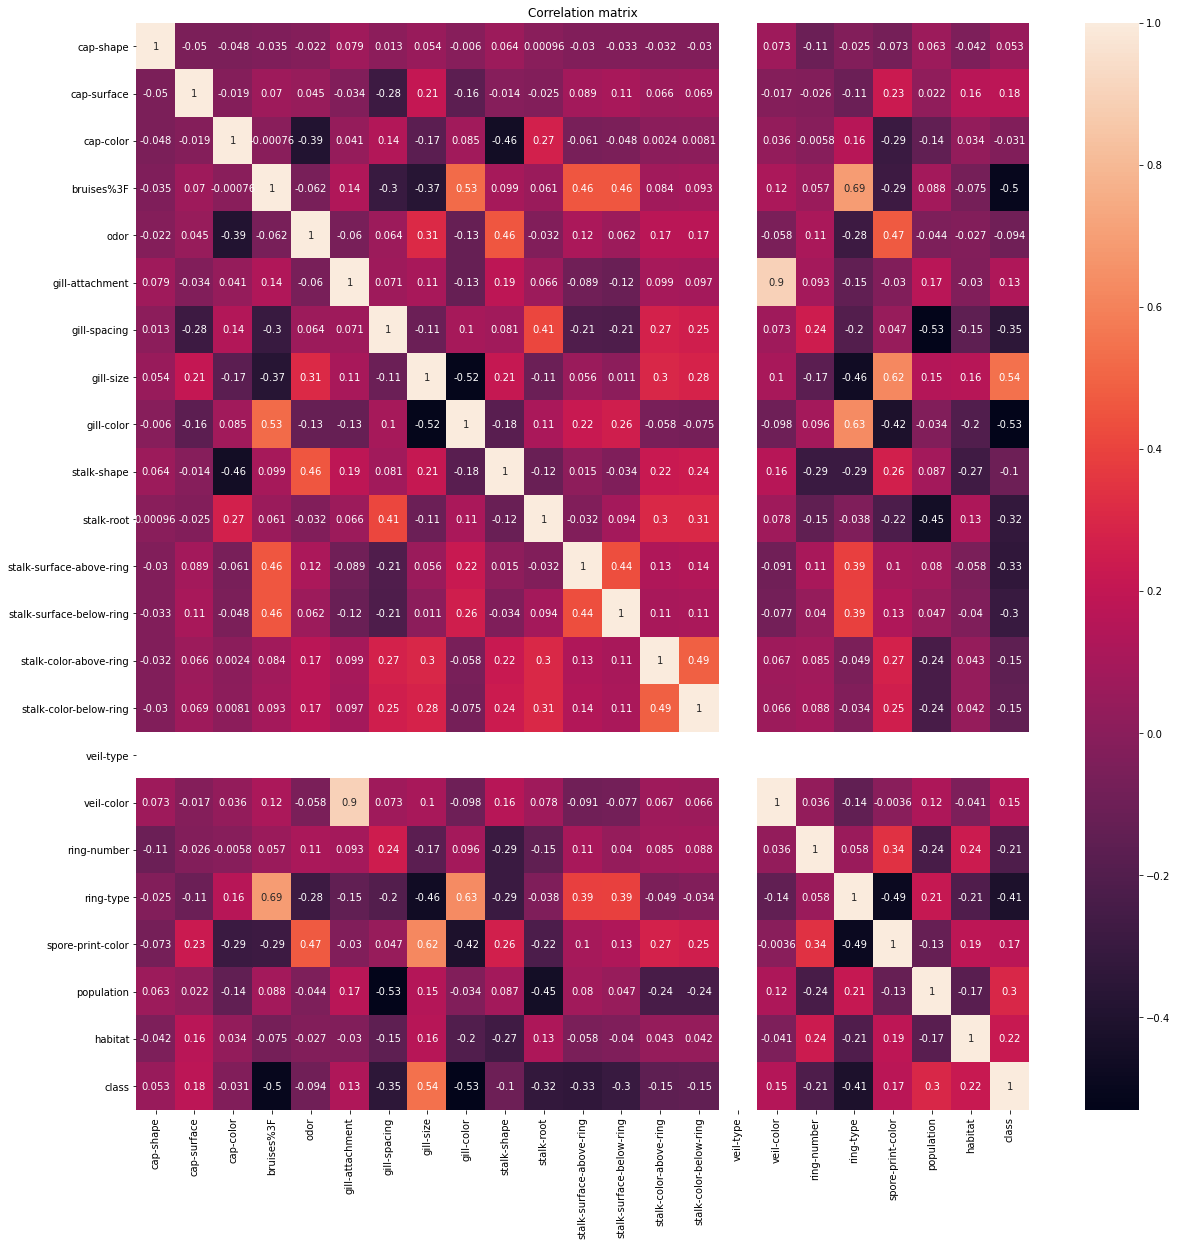

In [16]:
#plotting graph for correlation
plt.figure(figsize=[20,20])

#plot the correlation matrix
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation matrix")
plt.show()

In [17]:
corr_matrix=data.corr()
corr_matrix["class"].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-root                 -0.324194
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
ring-type                  -0.411771
bruises%3F                 -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

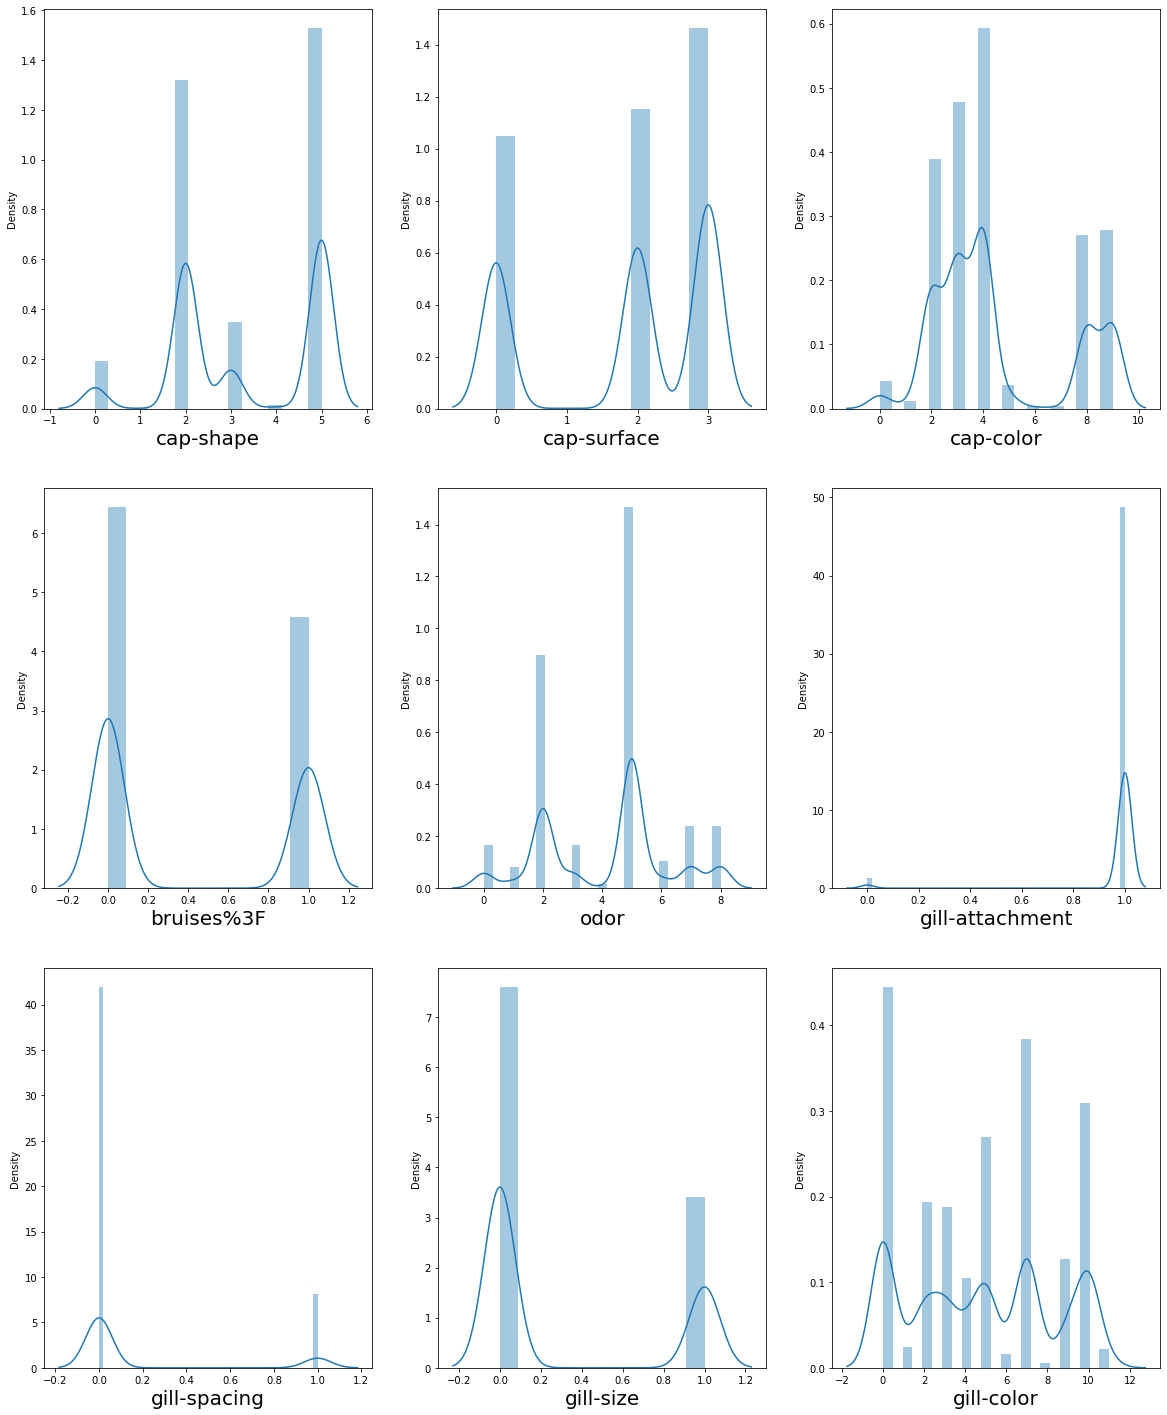

In [18]:
#let's check the data distribution among all the columns



plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

# checking skewness

In [19]:
x.skew().sort_values()

veil-color                 -6.946944
gill-attachment            -5.977076
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
population                 -1.413096
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
cap-surface                -0.590859
ring-type                  -0.290018
stalk-shape                -0.271345
cap-shape                  -0.247052
odor                       -0.080790
veil-type                   0.000000
gill-color                  0.061410
bruises%3F                  0.342750
spore-print-color           0.548426
cap-color                   0.706965
gill-size                   0.825797
habitat                     0.985548
stalk-root                  1.706938
gill-spacing                1.840088
ring-number                 2.701657
dtype: float64

we can see skewness in tha dataset

In [20]:
#remove skewness

from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.035775,0.050170,-0.026740,1.185917,0.881477,0.162896,-0.438864,1.494683,-0.080699,-1.144806,1.865154,0.708807,0.553899,0.765581,0.769774,0.0,0.098221,-0.200377,0.933807,-0.537148,-0.800530,1.515489
1,1.035775,0.050170,1.563194,1.185917,-2.030416,0.162896,-0.438864,-0.669038,-0.080699,-1.144806,1.736920,0.708807,0.553899,0.765581,0.769774,0.0,0.098221,-0.200377,0.933807,0.019064,-1.474856,0.116348
2,-2.027882,0.050170,1.305930,1.185917,-0.528118,0.162896,-0.438864,-0.669038,0.186585,-1.144806,1.736920,0.708807,0.553899,0.765581,0.769774,0.0,0.098221,-0.200377,0.933807,0.019064,-1.474856,1.066339
3,1.035775,0.998646,1.305930,1.185917,0.881477,0.162896,-0.438864,1.494683,0.186585,-1.144806,1.865154,0.708807,0.553899,0.765581,0.769774,0.0,0.098221,-0.200377,0.933807,-0.537148,-0.800530,1.515489
4,1.035775,0.050170,-0.490015,-0.843230,0.417908,0.162896,2.278612,-0.669038,-0.080699,0.873511,1.865154,0.708807,0.553899,0.765581,0.769774,0.0,0.098221,-0.200377,-1.291192,0.019064,-2.108626,0.116348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.234089,0.050170,-0.026740,-0.843230,0.417908,-6.138869,-0.438864,-0.669038,1.522575,-1.144806,-0.546207,0.708807,0.553899,-0.939926,-0.902249,0.0,-4.634069,-0.200377,0.933807,-2.806195,-1.898575,0.702479
8120,1.035775,0.050170,-0.026740,-0.843230,0.417908,-6.138869,-0.438864,-0.669038,1.522575,-1.144806,-0.546207,0.708807,0.553899,-0.939926,-0.902249,0.0,-5.190986,-0.200377,0.933807,-2.806195,0.154124,0.702479
8121,-0.851275,0.050170,-0.026740,-0.843230,0.417908,-6.138869,-0.438864,-0.669038,0.186585,-1.144806,-0.546207,0.708807,0.553899,-0.939926,-0.902249,0.0,-4.634069,-0.200377,0.933807,-2.806195,-1.898575,0.702479
8122,-0.234089,0.998646,-0.026740,-0.843230,1.794391,0.162896,-0.438864,1.494683,-1.502261,0.873511,-0.546207,0.708807,-0.994621,0.765581,0.769774,0.0,0.098221,-0.200377,-1.291192,1.298625,0.154124,0.702479


In [21]:
#validating that skewness has been removed or not

x.skew().sort_values(ascending=False)

veil-color                  5.797741
gill-spacing                1.840088
stalk-root                  1.286791
gill-size                   0.825797
bruises%3F                  0.342750
habitat                     0.123132
spore-print-color           0.018174
cap-color                   0.004059
veil-type                   0.000000
stalk-surface-below-ring   -0.114150
odor                       -0.144660
cap-shape                  -0.205860
gill-color                 -0.246738
stalk-shape                -0.271345
ring-type                  -0.339232
population                 -0.368219
stalk-surface-above-ring   -0.438332
cap-surface                -0.473764
ring-number                -0.499098
stalk-color-below-ring     -0.925320
stalk-color-above-ring     -0.964471
gill-attachment            -5.977076
dtype: float64

In [25]:
#finding best random_state
maxAccu=0    #maximum accuracy
maxRS=0    #best random state value

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is :",maxAccu,"on Random_state",maxRS)

best accuracy is : 0.9798129000492368 on Random_state 180


# Training process

In [26]:
#spliting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 180)

In [29]:
x_train

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
340,1.035775,0.050170,1.305930,1.185917,-2.030416,0.162896,-0.438864,-0.669038,-0.080699,-1.144806,1.736920,0.708807,0.553899,0.765581,0.769774,0.0,0.098221,-0.200377,0.933807,0.019064,-0.800530,0.116348
2623,-0.851275,-1.450316,-0.026740,1.185917,0.417908,0.162896,-0.438864,-0.669038,1.114811,0.873511,-0.546207,0.708807,0.553899,-0.215418,-1.751619,0.0,0.098221,-0.200377,0.933807,-0.537148,1.414468,-1.123374
1335,1.035775,-1.450316,-0.026740,1.185917,0.417908,0.162896,-0.438864,-0.669038,0.186585,0.873511,-0.546207,0.708807,0.553899,-0.215418,-1.751619,0.0,0.098221,-0.200377,0.933807,-0.537148,1.414468,-1.123374
3982,-0.851275,0.050170,1.305930,1.185917,-1.013841,0.162896,-0.438864,-0.669038,0.673633,0.873511,-0.546207,-1.866791,0.553899,0.765581,0.769774,0.0,0.098221,-0.200377,0.933807,-1.347249,0.154124,0.116348
6502,-0.851275,0.998646,-1.055290,-0.843230,-1.013841,0.162896,-0.438864,1.494683,-1.502261,0.873511,-0.546207,0.708807,-0.994621,0.765581,0.769774,0.0,0.098221,-0.200377,-1.291192,1.298625,0.154124,-1.123374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8069,-0.234089,0.050170,-0.026740,-0.843230,0.417908,-6.138869,-0.438864,-0.669038,0.186585,-1.144806,-0.546207,0.708807,0.553899,-0.939926,-0.902249,0.0,-5.190986,-0.200377,0.933807,0.019064,-1.898575,0.702479
2077,-0.851275,0.998646,-0.026740,1.185917,0.417908,0.162896,-0.438864,-0.669038,1.322319,0.873511,-0.546207,0.708807,0.553899,0.765581,0.769774,0.0,0.098221,-0.200377,0.933807,0.019064,1.414468,-1.123374
1035,-0.851275,-1.450316,1.305930,-0.843230,0.417908,0.162896,2.278612,-0.669038,0.673633,0.873511,1.865154,-1.866791,-1.983766,0.765581,0.769774,0.0,0.098221,-0.200377,-1.291192,-0.537148,-2.108626,0.116348
2838,1.035775,0.998646,-1.055290,1.185917,0.417908,0.162896,-0.438864,-0.669038,1.114811,0.873511,-0.546207,0.708807,0.553899,-1.781521,-0.186790,0.0,0.098221,-0.200377,0.933807,-0.537148,1.414468,-1.123374


In [30]:
x_test

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4101,1.035775,-1.450316,1.563194,-0.843230,-1.013841,0.162896,-0.438864,-0.669038,0.673633,-1.144806,-0.546207,-1.155298,-0.994621,-2.107694,-0.186790,0.0,0.098221,-0.200377,-0.081598,-1.347249,0.154124,1.322151
3939,1.035775,-1.450316,0.368698,-0.843230,-1.512126,0.162896,-0.438864,1.494683,0.186585,-1.144806,-0.546207,0.708807,0.553899,0.765581,0.769774,0.0,0.098221,-0.200377,0.933807,0.019064,0.154124,-1.123374
2229,1.035775,-1.450316,-1.055290,1.185917,0.417908,0.162896,-0.438864,-0.669038,0.673633,0.873511,-0.546207,0.708807,0.553899,-1.781521,0.769774,0.0,0.098221,-0.200377,0.933807,-0.537148,0.154124,-1.123374
1460,1.035775,-1.450316,-0.026740,1.185917,0.417908,0.162896,-0.438864,-0.669038,0.673633,0.873511,-0.546207,0.708807,0.553899,0.765581,-1.751619,0.0,0.098221,-0.200377,0.933807,0.019064,0.154124,-1.123374
3225,-0.851275,-1.450316,-0.490015,1.185917,0.417908,0.162896,-0.438864,-0.669038,1.114811,0.873511,-0.546207,0.708807,0.553899,-1.781521,-0.186790,0.0,0.098221,-0.200377,0.933807,0.019064,1.414468,-1.123374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,1.035775,-1.450316,-0.490015,-0.843230,0.417908,0.162896,2.278612,-0.669038,-0.369886,0.873511,1.865154,-1.866791,-1.983766,0.765581,0.769774,0.0,0.098221,-0.200377,-1.291192,-0.537148,-0.800530,0.116348
4516,1.035775,0.998646,-0.490015,-0.843230,-1.013841,0.162896,-0.438864,-0.669038,-0.369886,-1.144806,-0.546207,-1.155298,-0.994621,-2.107694,-0.186790,0.0,0.098221,-0.200377,-0.081598,-1.347249,0.154124,0.116348
5183,1.035775,0.050170,-2.918144,1.185917,-1.013841,0.162896,-0.438864,-0.669038,1.322319,0.873511,-0.546207,-1.866791,0.553899,0.765581,0.769774,0.0,0.098221,-0.200377,0.933807,-1.347249,0.154124,1.515489
5829,-0.851275,0.998646,1.563194,-0.843230,-1.013841,0.162896,-0.438864,-0.669038,0.673633,-1.144806,-0.546207,-1.155298,-0.994621,-1.448663,-2.097276,0.0,0.098221,-0.200377,-0.081598,-1.347249,1.414468,-1.123374


In [31]:
y_train

340     0
2623    0
1335    0
3982    1
6502    1
       ..
8069    0
2077    0
1035    0
2838    0
7921    0
Name: class, Length: 6093, dtype: int32

In [32]:
y_test

4101    1
3939    1
2229    0
1460    0
3225    0
       ..
1711    0
4516    1
5183    1
5829    1
1810    1
Name: class, Length: 2031, dtype: int32

# Logistic Regression

In [35]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy 97.98129000492368
[[1029   28]
 [  13  961]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1057
           1       0.97      0.99      0.98       974

    accuracy                           0.98      2031
   macro avg       0.98      0.98      0.98      2031
weighted avg       0.98      0.98      0.98      2031



# DecisionTree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
predict=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,predict)*100)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

Accuracy 100.0
[[1057    0]
 [   0  974]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      1.00      1.00       974

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 100.0
[[1057    0]
 [   0  974]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      1.00      1.00       974

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# SVC(Support Vector Classifier)

In [41]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))


Accuracy 99.9507631708518
[[1056    1]
 [   0  974]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      1.00      1.00       974

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



LogisticRegression,RandomForest and SVC are predicting good accuracy. now we will check cross validation score as well for overfitting

# Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print("Cross Validation score of Logistic Regression model:",scr.mean())

Cross Validation score of Logistic Regression model: 0.8754056839712012


In [44]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation score of Random FOrest:",scr.mean())

Cross Validation score of Random FOrest: 0.890659946949602


In [45]:
scr=cross_val_score(svc,x,y,cv=5)
print("Cross Validation score of SVC:",scr.mean())

Cross Validation score of SVC: 0.8654174308450171


Random forest is performing best among all so we will continue with Random Forest

# Hyper parameter tuning

In [46]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCv
parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':['gini','entropy']}

In [47]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)    #fitting the data in the model
GCV.best_params_          #print the best parameter found by GridSearchCV

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}

In [50]:
GCV_pred=GCV.best_estimator_.predict(x_test)     #prediccting with best parameters
accuracy_score(y_test,GCV_pred)

0.999015263417036

# ROC AUC plot

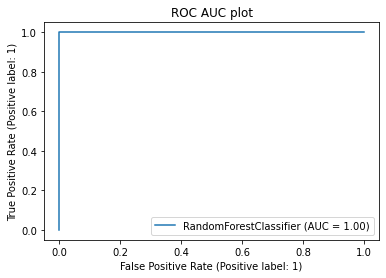

In [52]:
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# saving the model in pickle form

In [53]:
import joblib
joblib.dump(GCV.best_estimator_,"Mashrooms.pkl")

['Mashrooms.pkl']